# AS - Campagne Expérimentale
----
2018-2019

BINOME : Juliette ORTHOLAND, Stieban FERNANDEZ

#### Librairies et modules utiles

In [138]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

from workingFunctions import *
from neural_network_pytorch_grad import *

from torch.nn import Linear as ModuleLinear
from torch.nn import Threshold as Activation
from torch.nn import MSELoss as MSE
from torch.nn import HingeEmbeddingLoss as Hinge
from torch.nn import CrossEntropyLoss as CrossEntropy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Jeu de données : MNIST

In [2]:
## une fois le dataset telecharge, mettre download=False !
## Pour le test, train = False
## transform permet de faire un preprocessing des donnees (ici ?)
batch_size=600
nb_digits=10
train_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,),(0.3081,))])), batch_size=batch_size, shuffle=True) 

y_onehot = torch.FloatTensor(batch_size, nb_digits) 

for i,(data,target) in enumerate(train_loader):
    #print(i,data.size(),data.type(),target.size(),target.type())
    # do something...
    X = data.view(batch_size, -1)
    ## Encoding des labels en onehot
    y_onehot.zero_()
    y_onehot.scatter_(1, target.view(-1,1), 1)
    break


In [3]:
X, y_onehot

(tensor([[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         ...,
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.]]))

In [4]:
X.requires_grad = True
y_onehot.requires_grad = True

In [ ]:
X_train,X_test,X_val, y_train,y_test,y_val= split_train_test(X, y_onehot)

## Perceptron - Coût MSE

### Batch

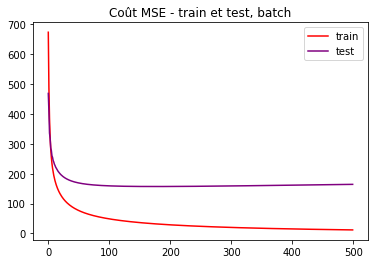

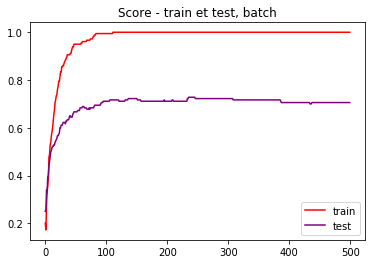

validation score: 0.6666666666666666


In [120]:
nn = NeuralNetwork(loss=MSE())
nn.add_layer( ModuleLinear(len(X[0]), len(y_train[0])) )
costs, costs_test,scores,scores_test = nn.fit_and_test(X_train, y_train, X_test, y_test, mode="batch", max_iter=500, epsilon=2e-5)

plt.title("Coût MSE - train et test, batch")
plt.plot(range(len(costs)), costs, c="red", label = 'train')
plt.plot(range(len(costs_test)),costs_test, c="purple", label = 'test')
plt.legend()
plt.show()

plt.title("Score - train et test, batch")
plt.plot(range(len(scores)), scores, c="red", label = 'train')
plt.plot(range(len(scores_test)), scores_test, c="purple", label = 'test')
plt.legend()
plt.show()

print("Validation Score: " + str(nn.score(X_val,y_val)))

### Stochastique

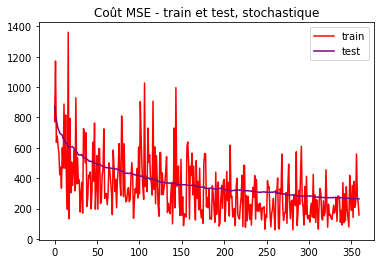

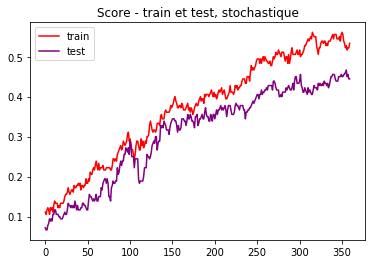

Validation Score: 0.4083333333333333


In [121]:
nn = NeuralNetwork(loss=MSE())
nn.add_layer( ModuleLinear(len(X[0]), len(y_train[0])) )
costs, costs_test,scores,scores_test = nn.fit_and_test(X_train, y_train, X_test, 
                                                       y_test, mode="stoch",max_iter = 2, epsilon = 1e-4)

plt.title("Coût MSE - train et test, stochastique")
plt.plot(range(len(costs)), costs, c="red", label = 'train')
plt.plot(range(len(costs_test)),costs_test, c="purple", label = 'test')
plt.legend()
plt.show()

plt.title("Score - train et test, stochastique")
plt.plot(range(len(scores)), scores, c="red", label = 'train')
plt.plot(range(len(scores_test)), scores_test, c="purple", label = 'test')
plt.legend()
plt.show()

print("Validation Score: " + str(nn.score(X_val,y_val)))

### mini_batch

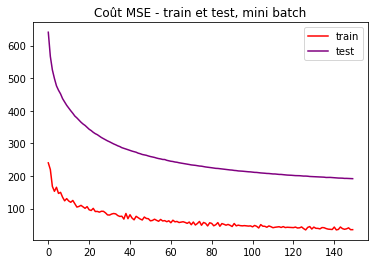

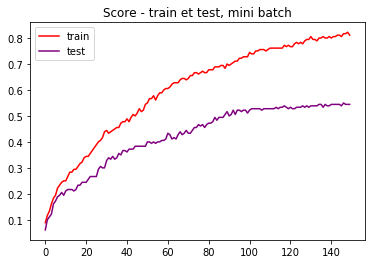

Validation Score: 0.6166666666666667


In [124]:
nn = NeuralNetwork(loss=MSE())
nn.add_layer( ModuleLinear(len(X[0]), len(y_train[0])) )
costs, costs_test,scores,scores_test = nn.fit_and_test(X_train, y_train, X_test, y_test, 
                                                       mode="mini_batch",max_iter = 50, epsilon = 1e-5)

plt.title("Coût MSE - train et test, mini batch")
plt.plot(range(len(costs)), costs, c="red", label = 'train')
plt.plot(range(len(costs_test)),costs_test, c="purple", label = 'test')
plt.legend()
plt.show()

plt.title("Score - train et test, mini batch")
plt.plot(range(len(scores)), scores, c="red", label = 'train')
plt.plot(range(len(scores_test)), scores_test, c="purple", label = 'test')
plt.legend()
plt.show()

print("Validation Score: " + str(nn.score(X_val,y_val)))

## Perceptron - Coût Hinge

### Batch

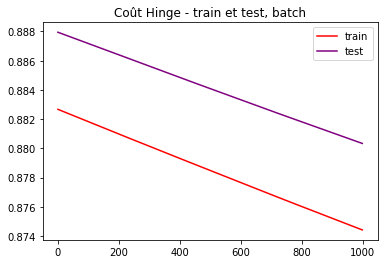

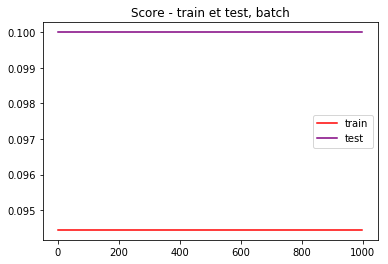

Validation Score: 0.1125


In [136]:
nn = NeuralNetwork(loss=Hinge())
nn.add_layer( ModuleLinear(len(X[0]), len(y_train[0])) )
costs, costs_test,scores,scores_test = nn.fit_and_test(X_train, y_train, X_test, y_test, mode="batch",
                                                       max_iter=1000, epsilon=2e-5)
plt.title("Coût Hinge - train et test, batch")
plt.plot(range(len(costs)), costs, c="red", label = 'train')
plt.plot(range(len(costs_test)),costs_test, c="purple", label = 'test')
plt.legend()
plt.show()

plt.title("Score - train et test, batch")
plt.plot(range(len(scores)), scores, c="red", label = 'train')
plt.plot(range(len(scores_test)), scores_test, c="purple", label = 'test')
plt.legend()
plt.show()

print("Validation Score: " + str(nn.score(X_val,y_val)))

### Stochastique

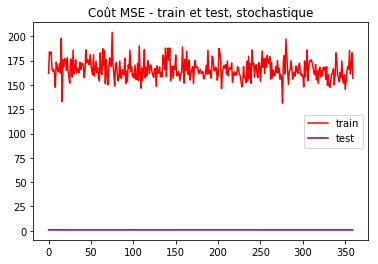

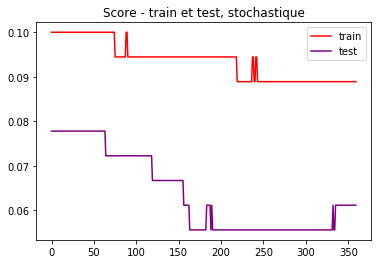

Validation Score: 0.07916666666666666


In [135]:
nn = NeuralNetwork(loss=Hinge())
nn.add_layer( ModuleLinear(len(X[0]), len(y_train[0])) )
costs, costs_test,scores,scores_test = nn.fit_and_test(X_train, y_train, X_test, 
                                                       y_test, mode="stoch",max_iter = 2, epsilon = 1e-4)

plt.title("Coût Hinge - train et test, stochastique")
plt.plot(range(len(costs)), costs, c="red", label = 'train')
plt.plot(range(len(costs_test)),costs_test, c="purple", label = 'test')
plt.legend()
plt.show()

plt.title("Score - train et test, stochastique")
plt.plot(range(len(scores)), scores, c="red", label = 'train')
plt.plot(range(len(scores_test)), scores_test, c="purple", label = 'test')
plt.legend()
plt.show()

print("Validation Score: " + str(nn.score(X_val,y_val)))

### Mini batch

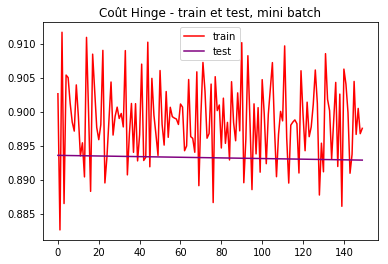

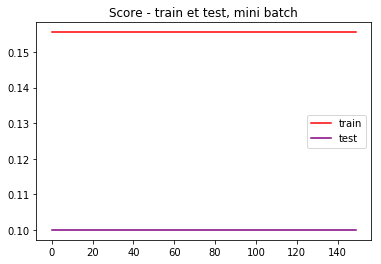

Validation Score: 0.0875


In [146]:
nn = NeuralNetwork(loss=Hinge())
nn.add_layer( ModuleLinear(len(X[0]), len(y_train[0])) )
costs, costs_test,scores,scores_test = nn.fit_and_test(X_train, y_train, X_test, y_test, 
                                                       mode="mini_batch",max_iter = 50, epsilon = 1e-5)

plt.title("Coût Hinge - train et test, mini batch")
plt.plot(range(len(costs)), costs, c="red", label = 'train')
plt.plot(range(len(costs_test)),costs_test, c="purple", label = 'test')
plt.legend()
plt.show()

plt.title("Score - train et test, mini batch")
plt.plot(range(len(scores)), scores, c="red", label = 'train')
plt.plot(range(len(scores_test)), scores_test, c="purple", label = 'test')
plt.legend()
plt.show()

print("Validation Score: " + str(nn.score(X_val,y_val)))

----

## Réseau de neurones

### Avec Tanh

Attention Hardtanh(min_val=-1, max_val=1) n'a pas d'attribut weight
Attention Hardtanh(min_val=-1, max_val=1) n'a pas d'attribut weight


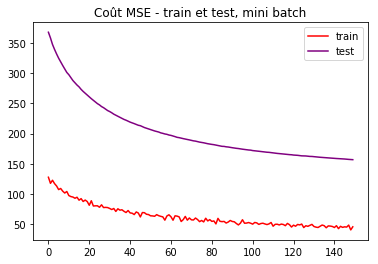

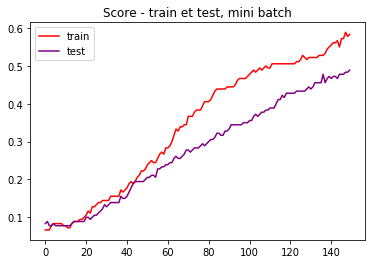

Validation Score: 0.475


In [153]:
nn = NeuralNetwork(loss=MSE())

model1 = ModuleLinear(len(X[0]), 15)
activ1 = torch.nn.Hardtanh()
model2 = ModuleLinear(15, len(y_train[0]))
activ2 = torch.nn.Hardtanh()

nn.add_layer([model1, activ1, model2, activ2])
costs, costs_test,scores,scores_test = nn.fit_and_test(X_train, y_train, X_test, y_test, mode="mini_batch",
                                                      max_iter = 50, epsilon = 1e-5)

plt.title("Coût MSE - train et test, mini batch")
plt.plot(range(len(costs)), costs, c="red", label = 'train')
plt.plot(range(len(costs_test)),costs_test, c="purple", label = 'test')
plt.legend()
plt.show()

plt.title("Score - train et test, mini batch")
plt.plot(range(len(scores)), scores, c="red", label = 'train')
plt.plot(range(len(scores_test)), scores_test, c="purple", label = 'test')
plt.legend()
plt.show()

print("Validation Score: " + str(nn.score(X_val,y_val)))

### Avec Sigmoid et Softmax

Attention LogSigmoid() n'a pas d'attribut weight
Attention Softmax() n'a pas d'attribut weight


C:\Users\Juliette\Dropbox\ecole_ing\DAC\AS\AS-TME1\Campagne Exp\neural_network_pytorch_grad.py:79: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.forward(X)[-1]
C:\Users\Juliette\Dropbox\ecole_ing\DAC\AS\AS-TME1\Campagne Exp\neural_network_pytorch_grad.py:100: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  ypred = self.forward(X)[-1]


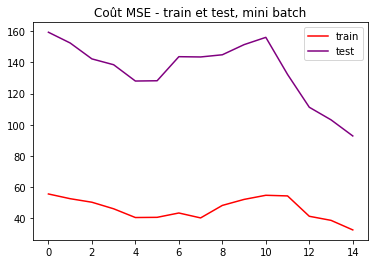

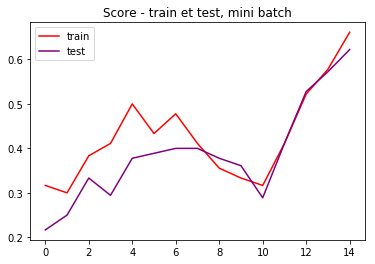

Validation Score: 0.5916666666666667


In [163]:
nn = NeuralNetwork(loss=MSE())

model1 = ModuleLinear(len(X[0]), 15)
activ1 = torch.nn.LogSigmoid()
model2 = ModuleLinear(15, len(y_train[0]))
activ2 = torch.nn.Softmax()

nn.add_layer([model1, activ1, model2, activ2])
costs, costs_test,scores,scores_test = nn.fit_and_test(X_train, y_train, X_test, y_test, mode="mini batch", 
                                                       max_iter = 5, epsilon = 1e-2)

plt.title("Coût MSE - train et test, mini batch")
plt.plot(range(len(costs)), costs, c="red", label = 'train')
plt.plot(range(len(costs_test)),costs_test, c="purple", label = 'test')
plt.legend()
plt.show()

plt.title("Score - train et test, mini batch")
plt.plot(range(len(scores)), scores, c="red", label = 'train')
plt.plot(range(len(scores_test)), scores_test, c="purple", label = 'test')
plt.legend()
plt.show()

print("Validation Score: " + str(nn.score(X_val,y_val)))

----